In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('4dinput.csv')  #使用panda讀取 4D space資料  

In [2]:
def cluster(df,cen):
    for i in cen.keys():
        df['dis_from_{}'.format(i)] = (
        np.sqrt( ( ( df['1']-cen[i][0] )**2 )
                +( ( df['2']-cen[i][1] )**2 )
                +( ( df['3']-cen[i][2] )**2 )
                +( ( df['4']-cen[i][3] )**2 ) ))
    cen_dis_cols = ['dis_from_{}'.format(i) for i in cen.keys()]
    df['closest'] = df.loc[:,cen_dis_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x:int(x.lstrip('dis_from_')))
    return df

In [3]:
def update(df,cen):
    for i in cen.keys():
        cen[i][0] = np.mean(df[df['closest'] == i]['1'])
        cen[i][1] = np.mean(df[df['closest'] == i]['2'])
        cen[i][2] = np.mean(df[df['closest'] == i]['3'])
        cen[i][3] = np.mean(df[df['closest'] == i]['4'])
    return cen

In [4]:
def kmeans(df,k):
    #Step1:根據K指定數隨機產生中心點
    k1 = np.random.randint(0, 300, k)
    k2 = np.random.randint(0, 300, k)
    k3 = np.random.randint(0, 300, k)
    k4 = np.random.randint(0, 300, k)
    cen = {
        i+1:[k1[i],k2[i],k3[i],k4[i]]
        for i in range (k)
        }
    while True:
        df = cluster(df,cen) #Step2:將每個點指定到離自己最近的中心
        closest_cen = df['closest'].copy(deep=True)
        cen = update(df,cen) #Step3:使用平均值計算新的中心點
        if closest_cen.equals(df['closest']): #Step4:如果群集中心收斂不動表示分類完成
            break
            
    return df

In [5]:
import copy
distortion = []
for k in range(2,10):
    testdf = copy.deepcopy(df)
    testdf = kmeans(testdf,k)
    dis = 0 
    for i in range (1,k+1):
        sse = np.square(testdf[testdf['closest'] == i]['dis_from_{}'.format(i)])
        dis = dis + sse.sum()
    distortion.append(dis)
    
print(distortion)

[3197614.0, 3784762.0, 1787076.0, 2379305.0, 901769.0, 1536667.0, 1670292.0, 2200520.0]


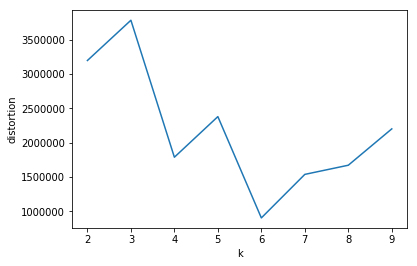

In [6]:
plt.plot(range(2,10),distortion)
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()

In [9]:
df = kmeans(df,4)
df.head(10)

,1,2,3,4,dis_from_1,dis_from_2,dis_from_3,dis_from_4,closest
0,21,49,31,251,176.252660,326.491960,243.739615,251.741931,1
1,21,53,25,244,171.604196,325.186101,242.812685,250.073989,1
2,21,105,41,267,132.442440,310.465779,257.482038,246.945338,1
3,81,66,239,97,258.654209,130.499042,75.881487,98.320903,3
4,69,3,132,73,257.219750,222.072060,75.762788,144.294837,3
5,228,29,193,207,281.634515,227.741081,170.334964,168.780923,4
6,22,132,63,198,90.586975,250.543409,209.389589,191.360916,1
7,15,158,29,167,84.320816,263.343882,230.837605,208.247449,1
8,25,127,55,232,97.775252,273.828413,231.140650,213.759210,1
9,16,118,40,277,129.784437,316.230928,270.536504,256.372775,1
